# Results of the personality test (interpreting REP grids)

First, import and wrangle the data set to achieve:
1. A grid of the rating results
2. Correct names for the columns (poles)
3. Row indexes that list each person

## Basic wrangling of data sets

In [2]:
# Doing the imports
import pandas as pd
import re
import seaborn as sns
import numpy as np
from scipy.cluster import hierarchy

np.set_printoptions(precision=3, linewidth=100, suppress=True)

df_raw = pd.read_csv('test_data.csv')
df_raw.head()

col_list = list(df_raw.columns)

# Use the following command to print a list and then reorder to create the dfs listed below
#print(col_list)

# Getting a df of the people used
df_people = df_raw[['role01', 'role02', 'role03', 'role04', 'role05', 'role06', 'role07', 'role08', 'role09', 
             'role10', 'role11', 'role12', 'role13', 'role14', 'role15']]
# Creating a df of the positive poles of each construct
df_pos_constructs = df_raw[['construct1pos', 'construct2pos', 'construct3pos', 'construct4pos', 'construct5pos', 
                     'construct6pos', 'construct7pos', 'construct8pos', 'construct9pos', 'construct10pos', 
                     'construct11pos', 'construct12pos', 'construct13pos', 'construct14pos', 'construct15pos']].T
# Df of negative construct poles
df_neg_constructs = df_raw[['construct1neg', 'construct2neg', 'construct3neg', 'construct4neg', 'construct5neg', 
                     'construct6neg', 'construct7neg', 'construct8neg', 'construct9neg', 'construct10neg', 
                     'construct11neg', 'construct12neg', 'construct13neg', 'construct14neg', 'construct15neg']].T
# Df (and wrangling) of main ratings matrix for PCA
df_ratings = df_raw[['id','rating_p1_const1', 'rating_p1_const2', 'rating_p1_const3', 'rating_p1_const4', 'rating_p1_const5', 
              'rating_p1_const6', 'rating_p1_const7', 'rating_p1_const8', 'rating_p1_const9',  'rating_p1_const10', 
              'rating_p1_const11', 'rating_p1_const12', 'rating_p1_const13', 'rating_p1_const14', 'rating_p1_const15',
              'rating_p2_const1',  'rating_p2_const2', 'rating_p2_const3', 'rating_p2_const4', 'rating_p2_const5', 
              'rating_p2_const6', 'rating_p2_const7', 'rating_p2_const8', 'rating_p2_const9', 'rating_p2_const10', 
              'rating_p2_const11', 'rating_p2_const12', 'rating_p2_const13', 'rating_p2_const14', 'rating_p2_const15',
              'rating_p3_const1', 'rating_p3_const2', 'rating_p3_const3', 'rating_p3_const4', 'rating_p3_const5', 
              'rating_p3_const6', 'rating_p3_const7', 'rating_p3_const8', 'rating_p3_const9', 'rating_p3_const10', 
              'rating_p3_const11', 'rating_p3_const12', 'rating_p3_const13', 'rating_p3_const14', 'rating_p3_const15', 
              'rating_p4_const1', 'rating_p4_const2', 'rating_p4_const3', 'rating_p4_const4', 'rating_p4_const5', 
              'rating_p4_const6', 'rating_p4_const7', 'rating_p4_const8', 'rating_p4_const9', 'rating_p4_const10', 
              'rating_p4_const11', 'rating_p4_const12', 'rating_p4_const13', 'rating_p4_const14', 'rating_p4_const15', 
              'rating_p5_const1', 'rating_p5_const2', 'rating_p5_const3', 'rating_p5_const4', 'rating_p5_const5', 
              'rating_p5_const6', 'rating_p5_const7', 'rating_p5_const8', 'rating_p5_const9', 'rating_p5_const10', 
              'rating_p5_const11', 'rating_p5_const12', 'rating_p5_const13', 'rating_p5_const14', 'rating_p5_const15', 
              'rating_p6_const1', 'rating_p6_const2', 'rating_p6_const3', 'rating_p6_const4', 'rating_p6_const5', 
              'rating_p6_const6', 'rating_p6_const7', 'rating_p6_const8', 'rating_p6_const9', 'rating_p6_const10', 
              'rating_p6_const11', 'rating_p6_const12', 'rating_p6_const13', 'rating_p6_const14', 'rating_p6_const15', 
              'rating_p7_const1', 'rating_p7_const2', 'rating_p7_const3', 'rating_p7_const4', 'rating_p7_const5', 
              'rating_p7_const6', 'rating_p7_const7', 'rating_p7_const8', 'rating_p7_const9', 'rating_p7_const10', 
              'rating_p7_const11', 'rating_p7_const12', 'rating_p7_const13', 'rating_p7_const14', 'rating_p7_const15', 
              'rating_p8_const1', 'rating_p8_const2', 'rating_p8_const3', 'rating_p8_const4', 'rating_p8_const5', 
              'rating_p8_const6', 'rating_p8_const7', 'rating_p8_const8', 'rating_p8_const9', 'rating_p8_const10', 
              'rating_p8_const11', 'rating_p8_const12', 'rating_p8_const13', 'rating_p8_const14', 'rating_p8_const15', 
              'rating_p9_const1', 'rating_p9_const2', 'rating_p9_const3', 'rating_p9_const4', 'rating_p9_const5', 
              'rating_p9_const6', 'rating_p9_const7', 'rating_p9_const8', 'rating_p9_const9', 'rating_p9_const10', 
              'rating_p9_const11', 'rating_p9_const12', 'rating_p9_const13', 'rating_p9_const14', 'rating_p9_const15', 
              'rating_p10_const1', 'rating_p10_const2', 'rating_p10_const3', 'rating_p10_const4', 'rating_p10_const5', 
              'rating_p10_const6', 'rating_p10_const7', 'rating_p10_const8', 'rating_p10_const9', 'rating_p10_const10', 
              'rating_p10_const11', 'rating_p10_const12', 'rating_p10_const13', 'rating_p10_const14', 'rating_p10_const15',     
              'rating_p11_const1', 'rating_p11_const2', 'rating_p11_const3', 'rating_p11_const4', 'rating_p11_const5', 
              'rating_p11_const6', 'rating_p11_const7', 'rating_p11_const8', 'rating_p11_const9', 'rating_p11_const10', 
              'rating_p11_const11', 'rating_p11_const12', 'rating_p11_const13', 'rating_p11_const14', 'rating_p11_const15', 
              'rating_p12_const1', 'rating_p12_const2', 'rating_p12_const3', 'rating_p12_const4', 'rating_p12_const5', 
              'rating_p12_const6', 'rating_p12_const7', 'rating_p12_const8', 'rating_p12_const9', 'rating_p12_const10', 
              'rating_p12_const11', 'rating_p12_const12', 'rating_p12_const13', 'rating_p12_const14', 'rating_p12_const15', 
              'rating_p13_const1', 'rating_p13_const2', 'rating_p13_const3', 'rating_p13_const4', 'rating_p13_const5', 
              'rating_p13_const6', 'rating_p13_const7', 'rating_p13_const8', 'rating_p13_const9', 'rating_p13_const10', 
              'rating_p13_const11', 'rating_p13_const12', 'rating_p13_const13', 'rating_p13_const14', 'rating_p13_const15', 
              'rating_p14_const1', 'rating_p14_const2', 'rating_p14_const3', 'rating_p14_const4', 'rating_p14_const5', 
              'rating_p14_const6', 'rating_p14_const7', 'rating_p14_const8', 'rating_p14_const9', 'rating_p14_const10', 
              'rating_p14_const11', 'rating_p14_const12', 'rating_p14_const13', 'rating_p14_const14', 'rating_p14_const15', 
              'rating_p15_const1', 'rating_p15_const2', 'rating_p15_const3', 'rating_p15_const4', 'rating_p15_const5', 
              'rating_p15_const6', 'rating_p15_const7', 'rating_p15_const8', 'rating_p15_const9', 'rating_p15_const10', 
              'rating_p15_const11', 'rating_p15_const12', 'rating_p15_const13', 'rating_p15_const14', 'rating_p15_const15'
                    ]]
# Rename the columns (could simplify above syntax by putting this earlier)
df_ratings.columns = [re.sub("rating_","", col_name) for col_name in df_ratings.columns]
# Making an ordered list of stub names for use in the wide-to-long command
target_ids=['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15']
# Making the initial long format matrix (transpose at the end)
ratings_matrix = pd.wide_to_long(df_ratings, 
                stubnames=target_ids,
               i='id', j='const', sep='_const')
ratings_matrix.columns = ['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14','c15']

# Making an ordered list of people's names
people_names = list(df_people.T[0])

# Also need to make a list of construct names
df_construct_list = df_pos_constructs.reset_index()
df_construct_list['neg'] = df_neg_constructs.reset_index().iloc[:,1]
df_construct_list = df_construct_list.drop(['index'], axis=1)
df_construct_list.columns = ['pos','neg']
df_construct_list['combined'] = df_construct_list[['pos', 'neg']].apply(lambda x: ' - '.join(x), axis=1)
pos_handles = list(df_pos_constructs.iloc[:,0])
neg_handles = list(df_neg_constructs.iloc[:,0])


In [3]:
np.set_printoptions(suppress=True)

In [96]:
# Tweaks for the test dataset

# The original dataframe had values for first target that were off by one, so run below when running the test data set
#ratings_matrix.iloc[0,:] -= 1
#people_names[14]='recep'
#people_names[15]='ME'


In [97]:
ratings_matrix

c1  c2  c3  c4  c5  c6  c7  c8  c9  c10  c11  c12  c13  c14  c15
id const                                                                  
1  1       0   1   0  -1  -1  -1  -1   1   0   -1    1   -1    1    1   -1
   2       0   0  -1   0  -1  -1  -1  -1  -1    1    1    0    1    1   -1
   3      -1  -1  -1  -1  -1  -1  -1  -1   1    1    1    1   -1    1    1
   4      -1   1   1   1   1   1  -1   0   1    1    1    1    1    1   -1
   5      -1  -1   0  -1  -1  -1  -1   0  -1   -1    1   -1    1    0   -1
   6       0  -1  -1  -1   0   1   0  -1   1    1   -1   -1   -1   -1    1
   7       0  -1   0   0   1   1   1  -1   1    1    0   -1   -1    0   -1
   8      -1  -1   0   0  -1  -1   1   1  -1    0    1    1    0   -1    1
   9       1   1   1   1  -1  -1  -1   1  -1   -1   -1    0    0   -1   -1
   10      1   1   1   1  -1  -1   1   1  -1   -1   -1    1    1   -1    1
   11     -1   0  -1  -1  -1   0   1  -1   1    1    0    1    1    1    1
   12     -1   0   0   1   0   1   0   1  -1    1   -1    0    0   -1   -1
   13      1   1   1   1   1  -1  -1   1   0   -1    0    0    0    0   -1
   14      0   1   1   0  -1  -1  -1   1  -1   -1   -1   -1    1    0    1
   15     -1   0  -1   0  -1   1   0   0   1    1   -1   -1   -1   -1    1

# PCA and automatic knee
This section runs PCA over the ratings matrix and then automatically detects the point of maximum curvature to return the best set of components that the individual uses to determine people's personalities.
The automatic knee comes from the <a href='https://github.com/arvkevi/kneed'>kneed</a> library implementation of <a href='https://raghavan.usc.edu//papers/kneedle-simplex11.pdf'>Satopåå et al's</a> work.

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(ratings_matrix)

#print(pca.singular_values_)
#print(pca.explained_variance_ratio_)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

The scree plot of eigenvalues is below. In my case, it looked somewhat linear.

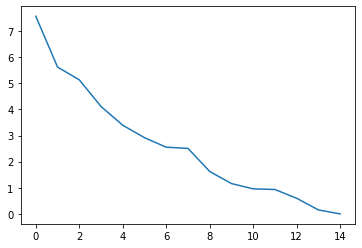

In [13]:
import matplotlib.pyplot as plt
plt.plot(pca.singular_values_)
plt.show()

In [12]:
from kneed import KneeLocator
x = list(range(1,16))
y = pca.singular_values_

matrix_knee = KneeLocator(x, y, S=1.0, curve='convex', direction='decreasing')
best_knee = matrix_knee.knee
print('The best knee in this dataset is {}'.format(best_knee))
print('The eigenvalue of the best knee is {}'.format(matrix_knee.knee_y))

NameError: name 'pca' is not defined

Below is the plot showing how the automatic knee was detected

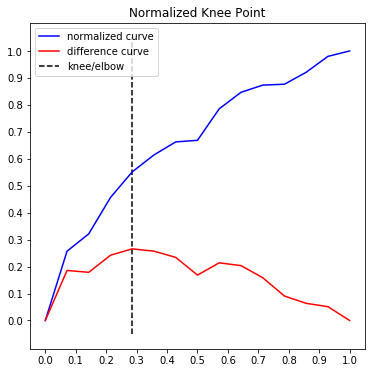

In [21]:
matrix_knee.plot_knee_normalized()

Apply rules to make a table with the correct loadings

Make a table with those components

In [74]:
#Make the dataframe
pca_kept = pd.DataFrame(pca.components_[0:best_knee].round(2)).T
pca_kept.index = df_construct_list['combined']
pca_kept.columns = ['Component {} ({:.0f} %)'.format(i+1, pca.explained_variance_ratio_[i]*100) for i in pca_kept.columns]

#pd.DataFrame(pca_kept.components_.round(2)).T
pca_kept

,Component 1 (33 %),Component 2 (18 %),Component 3 (15 %),Component 4 (10 %),Component 5 (7 %)
combined,,,,,
subtle - unrefined,0.25,-0.14,0.05,-0.11,-0.29
successful - unsuccessful,0.32,-0.04,0.17,0.19,-0.48
American - not american,0.35,-0.12,0.18,0.14,-0.04
not sexy - sexy,0.23,-0.28,0.25,0.30,0.14
tech - non-tech,-0.05,-0.16,0.51,0.08,0.02
incompetent - competent,-0.29,-0.34,0.32,0.02,0.03
boring - interesting,-0.15,-0.29,-0.22,0.31,0.20
young - old,0.38,-0.15,-0.06,0.04,0.13
family - not family,-0.36,-0.03,0.22,0.06,-0.51


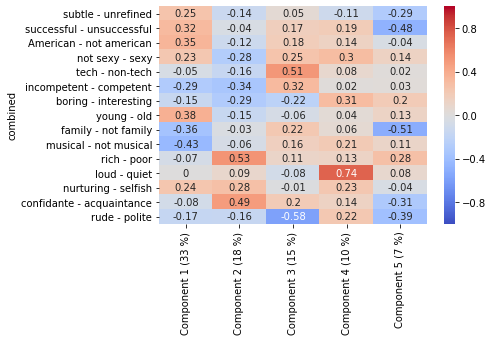

In [75]:
sns.heatmap(pca_kept, annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')

#### Cleaning the PCA matrix for interpretation.
Rules for removal. For each row, remove that row IF the two largest absolute values are within 0.1 of each other.
Second, remove all cells where the the absolute value is below .15

In [76]:
# Cleaning up the component matrix for interpretation

def cross_loading_finder(row_index):
    '''This function checks whether the two top loadings in a row
    are within 0.1 of each other'''
    row_maxes = np.sort(abs(pca_kept.iloc[row_index,:]))[-2:]
    return row_maxes[1]-row_maxes[0] < 0.10

def cross_loading_remover(row_index):
    '''This function nulls a row that has two top values within
    0.1 of each other'''
    row_maxes = np.sort(abs(pca_cleaned.iloc[row_index,:]))[-2:]
    if row_maxes[1]-row_maxes[0] < 0.10:
        pca_cleaned.iloc[row_index,:] = 0

pca_cleaned = pca_kept.copy() # copy the data so we don't overwrite it

# Now apply the two rules
for i in range(14): # remove the cross-loadings
    cross_loading_remover(i)
pca_cleaned[abs(pca_cleaned) < 0.15] = 0 #remove small loadings

pca_cleaned


,Component 1 (33 %),Component 2 (18 %),Component 3 (15 %),Component 4 (10 %),Component 5 (7 %)
combined,,,,,
subtle - unrefined,0.00,0.00,0.00,0.00,0.00
successful - unsuccessful,0.32,0.00,0.17,0.19,-0.48
American - not american,0.35,0.00,0.18,0.00,0.00
not sexy - sexy,0.00,0.00,0.00,0.00,0.00
tech - non-tech,0.00,-0.16,0.51,0.00,0.00
incompetent - competent,0.00,0.00,0.00,0.00,0.00
boring - interesting,0.00,0.00,0.00,0.00,0.00
young - old,0.38,-0.15,0.00,0.00,0.00
family - not family,-0.36,0.00,0.22,0.00,-0.51


In [184]:
mask = pca_cleaned==0

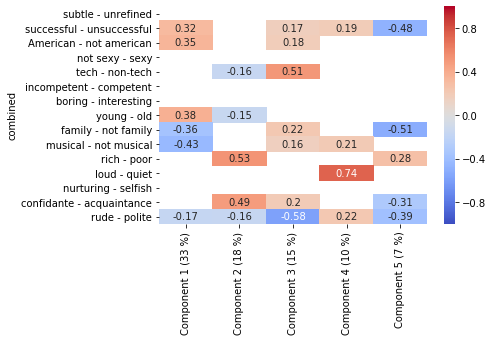

In [185]:
sns.heatmap(pca_cleaned, annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)


In [89]:
# Calculate dimensional score for each target on each dimeansion
# Need a people x component scores matrix
factor_scores = pd.DataFrame(np.dot(ratings_matrix, pca_kept))
factor_scores.index = people_names # Give the correct indices
factor_scores.columns = pca_kept.columns # Label the columns

# Finding the max on a dimension
def max_scorer(col_idx):
    '''This function returns the name of the most positive exemplar of a component'''
    return factor_scores.iloc[factor_scores.iloc[:,col_idx].argsort()].index[-1]

# Finding the min on a dimension
def min_scorer(col_idx):
    '''This function returns the name of the most negative exemplar of a component'''
    return factor_scores.iloc[factor_scores.iloc[:,col_idx].argsort()].index[0]

# Finding the top two people on a dimension
#factor_scores.iloc[factor_scores.iloc[:,0].abs().argsort()].iloc[-2:,0].index[0]


In [186]:
##  Now do a description of each component

#def component_describer(col_idx):
    
# Order each component by value
# Inspect that (dev phase)

# Describe the positive end of the pole
# Take top two positive and negative and any others > 0.2:
#sorted_col = pca_cleaned.iloc[:,col_idx].sort_values()
def pos_descriptors(col_idx):
    sorted_col = pca_cleaned.iloc[:,col_idx].sort_values()    
    if len (sorted_col[sorted_col > 0.2]) > 1:
        return sorted_col[sorted_col > 0.2]
    else:
        return sorted_col[-2:][sorted_col != 0] # take the two most positive but only if not zero

def neg_descriptors(col_idx):
    sorted_col = pca_cleaned.iloc[:,col_idx].sort_values()    
    if len (sorted_col[sorted_col <  -0.2]) > 1:
        return sorted_col[sorted_col < -0.2]
    else:
        return sorted_col[0:2][sorted_col != 0] # take the two most negative but only if not zero

    
col_idx=0
print(pca_cleaned.iloc[:,col_idx].sort_values())
print('The negative descriptors are {}'.format(neg_descriptors(col_idx)))
print('The positive descriptors are {}'.format(pos_descriptors(col_idx)))

# Describe the negative end of the pole

# List the positivist and negativist exemplars
for i in range(4):
    print ('Max scorer on dimension {} is {}'.format(i, max_scorer(i)))
    print ('Min scorer on dimension {} is {}'.format(i, min_scorer(i)))

# And find a positive and negative exemplar of each
# Take absolute value and then the most extreme


combined
musical - not musical       -0.43
family - not family         -0.36
rude - polite               -0.17
subtle - unrefined           0.00
not sexy - sexy              0.00
tech - non-tech              0.00
incompetent - competent      0.00
boring - interesting         0.00
rich - poor                  0.00
loud - quiet                 0.00
nurturing - selfish          0.00
confidante - acquaintance    0.00
successful - unsuccessful    0.32
American - not american      0.35
young - old                  0.38
Name: Component 1 (33 %), dtype: float64
The negative descriptors are combined
musical - not musical   -0.43
family - not family     -0.36
Name: Component 1 (33 %), dtype: float64
The positive descriptors are combined
successful - unsuccessful    0.32
American - not american      0.35
young - old                  0.38
Name: Component 1 (33 %), dtype: float64
Max scorer on dimension 0 is Janel
Min scorer on dimension 0 is Mr Taylor
Max scorer on dimension 1 is Philip 'dad'
Min 

In [106]:
neg_dim0 = neg_descriptors(0)
pos_dim0 = pos_descriptors(0)

neg_dim0

combined
musical - not musical   -0.43
family - not family     -0.36
Name: Component 1 (33 %), dtype: float64

In [171]:
pca_for_masking

,combined,Component 1 (33 %),Component 2 (18 %),Component 3 (15 %),Component 4 (10 %),Component 5 (7 %)
0,subtle - unrefined,0.00,0.00,0.00,0.00,0.00
1,successful - unsuccessful,0.32,0.00,0.17,0.19,-0.48
2,American - not american,0.35,0.00,0.18,0.00,0.00
3,not sexy - sexy,0.00,0.00,0.00,0.00,0.00
4,tech - non-tech,0.00,-0.16,0.51,0.00,0.00
5,incompetent - competent,0.00,0.00,0.00,0.00,0.00
6,boring - interesting,0.00,0.00,0.00,0.00,0.00
7,young - old,0.38,-0.15,0.00,0.00,0.00
8,family - not family,-0.36,0.00,0.22,0.00,-0.51
9,musical - not musical,-0.43,0.00,0.16,0.21,0.00


In [181]:
pca_for_masking = pca_cleaned.reset_index()
low_mask = pca_for_masking.iloc[:,1] <= -0.2
high_mask = pca_for_masking.iloc[:,1] >= 0.2
comp0_pos_pole = df_construct_list['neg'][low_mask].append(df_construct_list['pos'][high_mask])
comp0_neg_pole = df_construct_list['pos'][low_mask].append(df_construct_list['neg'][high_mask])

# Statement for neg pole
for i in range(1,best_knee+1):
    low_mask = pca_for_masking.iloc[:,i] <= -0.2
    high_mask = pca_for_masking.iloc[:,i] >= 0.2
    comp_pos_pole = df_construct_list['neg'][low_mask].append(df_construct_list['pos'][high_mask])
    comp_neg_pole = df_construct_list['pos'][low_mask].append(df_construct_list['neg'][high_mask])

    print('One end of construct {} is a combination of {}'.format(i, ', '.join(comp_neg_pole)))
    print('The person best showing these qualities is {}.'.format(min_scorer(i-1)))

# Statement for pos pole
    print('The other end of construct {} is a combination of {}'.format(i, ', '.join(comp_pos_pole)))
    print('The person best showing these qualities is {}.'.format(max_scorer(i-1)))


One end of construct 1 is a combination of family, musical, unsuccessful, not american, old
The person best showing these qualities is Mr Taylor.
The other end of construct 1 is a combination of not family, not musical, successful, American, young
The person best showing these qualities is Janel.
One end of construct 2 is a combination of poor, acquaintance
The person best showing these qualities is Boss.
The other end of construct 2 is a combination of rich, confidante
The person best showing these qualities is Philip 'dad'.
One end of construct 3 is a combination of rude, non-tech, not family, acquaintance
The person best showing these qualities is Alison.
The other end of construct 3 is a combination of polite, tech, family, confidante
The person best showing these qualities is Jo.
One end of construct 4 is a combination of not musical, quiet, polite
The person best showing these qualities is Ms Kresse.
The other end of construct 4 is a combination of musical, loud, rude
The person 

# Factor analysis version

In [6]:
# Sci-kit Learn does not have the features we need
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis()
fa.fit(ratings_matrix)
dir(fa)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_param_names',
 '_get_tags',
 'components_',
 'copy',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'iterated_power',
 'loglike_',
 'max_iter',
 'mean_',
 'n_components',
 'n_iter_',
 'noise_variance_',
 'noise_variance_init',
 'random_state',
 'score',
 'score_samples',
 'set_params',
 'svd_method',
 'tol',
 'transform']

## Factor Analyzer Module

In [7]:
from factor_analyzer import FactorAnalyzer

In [8]:
fa = FactorAnalyzer(n_factors=10, rotation='oblimin')
fa.fit(ratings_matrix)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=10, rotation='oblimin',
               rotation_kwargs={}, use_smc=True)

In [9]:
dir(fa)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_fit_factor_analysis',
 '_fit_ml_objective',
 '_fit_principal',
 '_fit_uls_objective',
 '_get_factor_variance',
 '_get_param_names',
 '_get_tags',
 '_normalize_ml',
 '_normalize_uls',
 'bounds',
 'corr_',
 'fit',
 'fit_transform',
 'get_communalities',
 'get_eigenvalues',
 'get_factor_variance',
 'get_params',
 'get_uniquenesses',
 'impute',
 'is_corr_matrix',
 'loadings_',
 'mean_',
 'method',
 'n_factors',
 'phi_',
 'rotation',
 'rotation_kwargs',
 'rotation_matrix_',
 'set_params',
 'std_',
 'structure_',
 'transform',
 'use_smc']

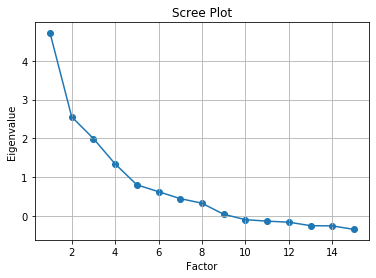

In [13]:
import matplotlib.pyplot as plt
# Scree plot

fa_eigens = fa.get_eigenvalues()[1]
plt.scatter(range(1, 16), fa_eigens)
plt.plot(x, fa_eigens)
plt.title('Scree Plot')
plt.xlabel("Factor")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()


In [14]:
# from kneed import KneeLocator
x = list(range(1,16))
y = fa_eigens

fa_matrix_knee = KneeLocator(x, y, S=1.0, curve='convex', direction='decreasing')
fa_best_knee = fa_matrix_knee.knee
print('The best knee in this dataset is {}'.format(fa_best_knee))
print('The eigenvalue of the best knee is {}'.format(fa_matrix_knee.knee_y))

The best knee in this dataset is 5
The eigenvalue of the best knee is 0.7994759759868637


In [15]:
# Refit with the knee
fa_kneed = FactorAnalyzer(n_factors=fa_best_knee, rotation='varimax').fit(ratings_matrix)

In [16]:
fa_kneed.get_factor_variance()
fa_kneed.get_eigenvalues()

(array([4.968, 2.805, 2.226, 1.529, 0.976, 0.794, 0.601, 0.558, 0.231, 0.113, 0.087, 0.079, 0.033,
        0.002, 0.   ]),
 array([ 4.746,  2.617,  2.024,  1.344,  0.817,  0.486,  0.301,  0.159,  0.022, -0.059, -0.092,
        -0.115, -0.166, -0.231, -0.316]))

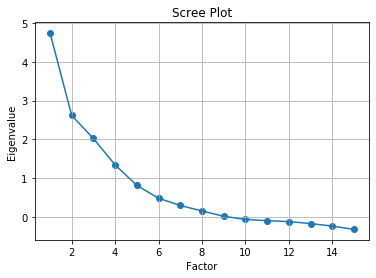

In [17]:
# Scree plot

fa_eigens = fa_kneed.get_eigenvalues()[1]
plt.scatter(range(1, 16), fa_eigens)
plt.plot(x, fa_eigens)
plt.title('Scree Plot')
plt.xlabel("Factor")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

In [18]:
 pd.DataFrame(fa_kneed.loadings_.round(2))

,0,1,2,3,4
0,-0.28,0.54,-0.13,0.12,-0.17
1,-0.16,0.96,0.20,0.06,0.07
2,-0.43,0.66,-0.06,0.43,0.10
3,-0.15,0.56,-0.34,0.57,0.34
4,0.47,0.15,-0.04,0.72,-0.00
5,0.77,-0.11,-0.36,0.28,-0.04
6,0.19,-0.18,-0.48,-0.17,0.31
7,-0.63,0.50,-0.22,0.17,0.05
8,0.85,-0.14,0.11,-0.07,-0.03
9,0.77,-0.46,-0.06,0.03,0.23


In [19]:
fa_kneed.get_factor_variance()[1][0]*100

20.99396548878428

In [20]:
# Now make a pretty table
#Make the dataframe
fa_kept = pd.DataFrame(fa_kneed.loadings_.round(2))
fa_kept.index = df_construct_list['combined']
fa_kept.index = fa_kept.index.rename(name='Construct')
fa_kept.columns = ['Component {} ({:.0f}%)'.format(i+1, fa_kneed.get_factor_variance()[1][i]*100) for i in fa_kept.columns]
fa_kept


,Component 1 (21%),Component 2 (19%),Component 3 (16%),Component 4 (12%),Component 5 (9%)
Construct,,,,,
subtle - unrefined,-0.28,0.54,-0.13,0.12,-0.17
successful - unsuccessful,-0.16,0.96,0.20,0.06,0.07
American - not american,-0.43,0.66,-0.06,0.43,0.10
not sexy - sexy,-0.15,0.56,-0.34,0.57,0.34
tech - non-tech,0.47,0.15,-0.04,0.72,-0.00
incompetent - competent,0.77,-0.11,-0.36,0.28,-0.04
boring - interesting,0.19,-0.18,-0.48,-0.17,0.31
young - old,-0.63,0.50,-0.22,0.17,0.05
family - not family,0.85,-0.14,0.11,-0.07,-0.03


In [26]:
fa_top3 = fa_kept.reset_index()
fa_top3
#fa_top3.apply(lambda x: x.abs().nlargest(3), axis=1)



,Construct,Component 1 (21%),Component 2 (19%),Component 3 (16%),Component 4 (12%),Component 5 (9%)
0,subtle - unrefined,-0.28,0.54,-0.13,0.12,-0.17
1,successful - unsuccessful,-0.16,0.96,0.20,0.06,0.07
2,American - not american,-0.43,0.66,-0.06,0.43,0.10
3,not sexy - sexy,-0.15,0.56,-0.34,0.57,0.34
4,tech - non-tech,0.47,0.15,-0.04,0.72,-0.00
5,incompetent - competent,0.77,-0.11,-0.36,0.28,-0.04
6,boring - interesting,0.19,-0.18,-0.48,-0.17,0.31
7,young - old,-0.63,0.50,-0.22,0.17,0.05
8,family - not family,0.85,-0.14,0.11,-0.07,-0.03
9,musical - not musical,0.77,-0.46,-0.06,0.03,0.23


In [39]:
top3_mask = fa_top3.iloc[:,4].abs().nlargest(3).index

top3_constructs = fa_top3.loc[top3_mask]
print(top3_constructs)
for i in range(0,3):
    if top3_constructs.iloc[i,4] > 0:
        print(df_pos_constructs.iloc[i,:])
    if top3_constructs.iloc[i,4] < 0:
        print('negative')
#top3_constructs
#print(top3_pospole.head())
#print(top3_negpole.head())

          Construct  Component 1 (21%)  Component 2 (19%)  Component 3 (16%)  \
14    rude - polite               0.14              -0.09              -0.35   
4   tech - non-tech               0.47               0.15              -0.04   
3   not sexy - sexy              -0.15               0.56              -0.34   

    Component 4 (12%)  Component 5 (9%)  
14              -0.74              0.24  
4                0.72             -0.00  
3                0.57              0.34  
negative
0    successful
Name: construct2pos, dtype: object
0    American
Name: construct3pos, dtype: object


In [65]:
top3_constructs

,Construct,Component 1 (21%),Component 2 (19%),Component 3 (16%),Component 4 (12%),Component 5 (9%)
14,rude - polite,0.14,-0.09,-0.35,-0.74,0.24
4,tech - non-tech,0.47,0.15,-0.04,0.72,-0.00
3,not sexy - sexy,-0.15,0.56,-0.34,0.57,0.34


In [80]:
# Used this as the basis for a future part
def get_pos_handle(i):
    '''returns the corresponding handle for positive pole from a top three position. zero-indexed'''
    if top3_constructs.iloc[i,1] > 0:
        print(pos_handles[top3_constructs.index[i]])
    elif top3_constructs.iloc[i,1] < 0:
        print(neg_handles[top3_constructs.index[i]])

sexy


In [95]:
def get_pos_handles(df, col_idx):
    '''For a dataframe, gives the handles for the top three loadings on the positive pole for that column.
    Important: the dataframe index must be an integer.'''
    # Make the top three
    top3_mask = df.iloc[:,col_idx].abs().nlargest(3).index
    top3_constructs = df.loc[top3_mask]
    pos_top3 = [] # Make a return list
    for i in range(0,3):     # Then get the handles for the top three constructs
        if top3_constructs.iloc[i,col_idx] > 0: # for positive loadings
            pos_top3.append(pos_handles[top3_constructs.index[i]])
        elif top3_constructs.iloc[i,col_idx] < 0: # for negative loadings
            pos_top3.append(neg_handles[top3_constructs.index[i]])
    return pos_top3     # Return a list    

def get_neg_handles(df, col_idx):
    '''For a dataframe, gives the handles for the top three loadings on the negative pole for that column.
    Important: the dataframe index must be an integer.'''
    # Make the top three
    top3_mask = df.iloc[:,col_idx].abs().nlargest(3).index
    top3_constructs = df.loc[top3_mask]
    pos_top3 = [] # Make a return list
    for i in range(0,3):     # Then get the handles for the top three constructs
        if top3_constructs.iloc[i,col_idx] < 0: # for negative loadings
            pos_top3.append(pos_handles[top3_constructs.index[i]])
        elif top3_constructs.iloc[i,col_idx] > 0: # for positive loadings
            pos_top3.append(neg_handles[top3_constructs.index[i]])
    return pos_top3     # Return a list    

print(get_pos_handles(fa_top3, 3))
print(get_neg_handles(fa_top3, 3))


['confidante', 'rich', 'interesting']
['acquaintance', 'poor', 'boring']


Dimension 1 is characterised by family, incompetent and musical at one pole, and not family, competent, not musical at the other pole. Of the people you listed, Mum is at the first end and Keith is at the second.

Dimension 2 is characterized by successful, non-sexy, American at one pole, and unsuccessful, not American and sexy at the other. Of the people you listed, Keith best typifies the first pole, Elizabeth is at the other.

Dimension 3 is characterized by being rich, boring confidantes at one pole, and poor, boring acquaintances at the other pole. Of the people you listed, Joel H best typifies the first pole, Mr Taylor best typifies the other pole.

A fourth way you judge people is 
Max scorer on dimension 4 is Keith T.
Min scorer on dimension 4 is Elizabeth Corrie
Max scorer on dimension 5 is Michael L.
Min scorer on dimension 5 is Deanne 'mum'

In [29]:

#polite, tech, not sexy
#rude, non-tech sexy

df_pos_constructs
df_neg_constructs

,0
construct1neg,unrefined
construct2neg,unsuccessful
construct3neg,not american
construct4neg,sexy
construct5neg,non-tech
construct6neg,competent
construct7neg,interesting
construct8neg,old
construct9neg,not family
construct10neg,not musical


In [36]:
# Calculate dimensional score for each target on each dimeansion
# Need a people x component scores matrix
factor_scores = pd.DataFrame(np.dot(ratings_matrix.T, fa_kept))
factor_scores.index = people_names # Give the correct indices
factor_scores.columns = fa_kept.columns # Label the columns
factor_scores

,Component 1 (21%),Component 2 (19%),Component 3 (16%),Component 4 (12%),Component 5 (9%)
Deanne 'mum',1.94,-1.63,0.67,-1.32,-1.48
Philip 'dad',0.63,-0.26,2.17,-0.86,0.22
Anthony,1.09,-0.73,0.97,0.26,0.24
Jo,0.60,-0.49,0.13,-1.27,1.58
Ms Kresse,-1.25,-0.93,-1.52,-0.46,0.07
Mr Taylor,0.52,-2.27,-2.65,-1.50,1.27
Elizabeth Corrie,0.09,-3.60,-1.19,-1.56,0.21
Alison,0.25,-0.14,1.20,-0.65,0.65
Janel,-1.13,-0.62,-1.92,-0.27,-0.19
Michael L.,-1.42,1.00,-1.85,-0.19,1.86


In [37]:

# Finding the max on a dimension
def max_scorer(col_idx):
    '''This function returns the name of the most positive exemplar of a component'''
    return factor_scores.iloc[factor_scores.iloc[:,col_idx].argsort()].index[-1]

# Finding the min on a dimension
def min_scorer(col_idx):
    '''This function returns the name of the most negative exemplar of a component'''
    return factor_scores.iloc[factor_scores.iloc[:,col_idx].argsort()].index[0]

# Finding the top two people on a dimension
#factor_scores.iloc[factor_scores.iloc[:,0].abs().argsort()].iloc[-2:,0].index[0]

for i in range(5):
    print ('Max scorer on dimension {} is {}'.format(i+1, max_scorer(i)))
    print ('Min scorer on dimension {} is {}'.format(i+1, min_scorer(i)))

Max scorer on dimension 1 is Deanne 'mum'
Min scorer on dimension 1 is Keith T.
Max scorer on dimension 2 is Keith T.
Min scorer on dimension 2 is Elizabeth Corrie
Max scorer on dimension 3 is Joel H.
Min scorer on dimension 3 is Mr Taylor
Max scorer on dimension 4 is Keith T.
Min scorer on dimension 4 is Elizabeth Corrie
Max scorer on dimension 5 is Michael L.
Min scorer on dimension 5 is Deanne 'mum'


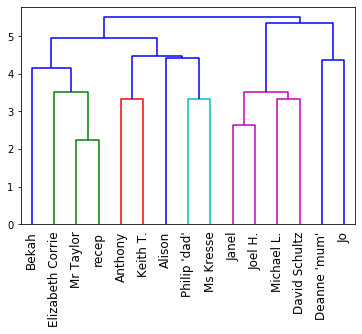

In [340]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ratings_matrix, 'average')
plt.figure()
dn = hierarchy.dendrogram(Z, labels=people_names, leaf_rotation=90)


In [ ]:
# Compute factor score by person

# Take outliers as exemplars



In [ ]:
# Need to do a cluster analysis and dendogram


In [47]:
# Here we use NMF instead
from sklearn.decomposition import NMF
results_nmf = NMF(n_components=4, random_state=10)
nmf_input_matrix = ratings_matrix + 1 # can't take -ve numbers
# Fit the basic model
results_nmf.fit_transform(nmf_input_matrix)


array([[0.74814107, 0.        , 1.05971722, 0.        ],
       [0.31927608, 0.1275731 , 1.32452479, 0.        ],
       [0.        , 0.28200813, 1.18613083, 0.78001788],
       [0.81383515, 1.2660785 , 1.19057438, 0.        ],
       [0.31177265, 0.        , 0.84048093, 0.        ],
       [0.        , 1.24148062, 0.        , 0.68557405],
       [0.13010567, 1.59366954, 0.34228821, 0.1335021 ],
       [0.49085148, 0.        , 0.50781968, 1.15694087],
       [1.27833238, 0.        , 0.        , 0.03195675],
       [1.31361238, 0.        , 0.        , 1.06724006],
       [0.02794525, 0.60007182, 1.14149488, 1.08053345],
       [0.73576193, 1.03733778, 0.        , 0.1823439 ],
       [1.25005619, 0.35033192, 0.33590326, 0.        ],
       [1.07385566, 0.        , 0.13169071, 0.50184886],
       [0.16009891, 1.14255623, 0.        , 0.72602946]])

  #### Trying NMF

In [48]:
# Print it with labels
nmf_kept = pd.DataFrame(results_nmf.components_.round(2)).T
nmf_kept.index = df_construct_list['combined']
nmf_kept

# We see here that the bipolar nature of the constructs is ignored by NMF (think! it is used for topic counts)

,0,1,2,3
combined,,,,
subtle - unrefined,1.18,0.06,0.00,0.00
successful - unsuccessful,1.55,0.12,0.28,0.00
American - not american,1.60,0.17,0.02,0.00
not sexy - sexy,1.39,0.51,0.00,0.00
tech - non-tech,0.32,0.91,0.00,0.00
incompetent - competent,0.00,1.52,0.00,0.01
boring - interesting,0.00,0.47,0.00,1.28
young - old,1.70,0.00,0.00,0.32
family - not family,0.00,1.13,0.52,0.36


In [49]:
# Rotating the factors required importing code from the factor_rotation module.

from __future__ import division
from __future__ import print_function

#import numpy as np
import scipy as sp
import scipy.linalg

def target_rotation(A, H, full_rank = False):
    ATH=A.T.dot(H)
    if full_rank or np.linalg.matrix_rank(ATH)==A.shape[1]:
        T = sp.linalg.fractional_matrix_power(ATH.dot(ATH.T),-1/2).dot(ATH)
    else:
        U,D,V=np.linalg.svd(ATH,full_matrices=False)
        T=U.dot(V)
    return T

def procrustes(A, H):
    return np.linalg.inv(A.T.dot(A)).dot(A.T).dot(H);

def promax(A,k=2):
    assert k>0
    #define rotation target using varimax rotation:
    from _wrappers import rotate_factors
    V, T = rotate_factors(A,'varimax')
    H = np.abs(V)**k/V
    #solve procrustes problem
    S=procrustes(A,H) #np.linalg.inv(A.T.dot(A)).dot(A.T).dot(H);
    #normalize
    d=np.sqrt(np.diag(np.linalg.inv(S.T.dot(S))));
    D=np.diag(d)
    T=np.linalg.inv(S.dot(D)).T
    #return
    return A.dot(T), T

def GPA(A, ff=None, vgQ=None, T=None, max_tries=501,
       rotation_method = 'orthogonal', tol=1e-5):
    #pre processing
    if rotation_method not in ['orthogonal', 'oblique']:
        raise ValueError('rotation_method should be one of {orthogonal, oblique}')
    if vgQ is None:
        if ff is None:
            raise ValueError('ff should be provided if vgQ is not')
        derivative_free=True
        Gff = lambda x: Gf(x, lambda y: ff(T=y,A=A,L=None))
    else:
        derivative_free=False
    if T is None:
        T=np.eye(A.shape[1])
    #pre processing for iteration
    al=1
    table=[]
    #pre processing for iteration: initialize f and G
    if derivative_free:
        f=ff(T=T,A=A,L=None)
        G=Gff(T)
    elif rotation_method == 'orthogonal': # and not derivative_free
        L= A.dot(T)
        f,Gq = vgQ(L=L)
        G=(A.T).dot(Gq)
    else: #i.e. rotation_method == 'oblique' and not derivative_free
        Ti=np.linalg.inv(T)
        L= A.dot(Ti.T)
        f,Gq = vgQ(L=L)
        G=-((L.T).dot(Gq).dot(Ti)).T
    #iteration
    for i_try in range(0,max_tries):
        #determine Gp
        if rotation_method == 'orthogonal':
            M=(T.T).dot(G)
            S=(M+M.T)/2
            Gp=G-T.dot(S)
        else: #i.e. if rotation_method == 'oblique':
            Gp=G-T.dot(np.diag(np.sum(T*G,axis=0)))
        s=np.linalg.norm(Gp,'fro');
        table.append([i_try, f, np.log10(s), al])
        #if we are close stop
        if s < tol: break
        #update T
        al=2*al
        for i in range(11):
            #determine Tt
            X=T-al*Gp
            if rotation_method == 'orthogonal':
                U,D,V=np.linalg.svd(X,full_matrices=False)
                Tt=U.dot(V)
            else: #i.e. if rotation_method == 'oblique':
                v=1/np.sqrt(np.sum(X**2,axis=0))
                Tt=X.dot(np.diag(v))
            #calculate objective using Tt
            if derivative_free:
                ft=ff(T=Tt,A=A,L=None)
            elif rotation_method == 'orthogonal': # and not derivative_free
                L=A.dot(Tt)
                ft,Gq=vgQ(L=L);
            else: #i.e. rotation_method == 'oblique' and not derivative_free
                Ti=np.linalg.inv(Tt)
                L= A.dot(Ti.T)
                ft,Gq = vgQ(L=L)
            #if sufficient improvement in objective -> use this T
            if ft<f-.5*s**2*al: break
            al=al/2
        #post processing for next iteration
        T=Tt
        f=ft
        if derivative_free:
            G=Gff(T)
        elif rotation_method == 'orthogonal': # and not derivative_free
            G=(A.T).dot(Gq)
        else: #i.e. rotation_method == 'oblique' and not derivative_free
            G=-((L.T).dot(Gq).dot(Ti)).T
    #post processing
    Th=T
    Lh = rotateA(A,T,rotation_method=rotation_method)
    Phi = (T.T).dot(T)
    return Lh, Phi, Th, table

def Gf(T, ff):
    """
    Subroutine for the gradient of f using numerical derivatives.
    """
    k=T.shape[0]
    ep = 1e-4
    G=np.zeros((k,k))
    for r in range(k):
        for s in range(k):
            dT=np.zeros((k,k))
            dT[r,s]=ep
            G[r,s]=(ff(T+dT)-ff(T-dT))/(2*ep);
    return G

def rotateA(A, T, rotation_method='orthogonal'):
    if rotation_method == 'orthogonal':
        L=A.dot(T)
    elif rotation_method == 'oblique':
        L=A.dot(np.linalg.inv(T.T))
    else: #i.e. if rotation_method == 'oblique':
        raise ValueError('rotation_method should be one of {orthogonal, oblique}')
    return L

def oblimin_objective(L=None, A=None, T=None, gamma=0,
                      rotation_method='orthogonal',
                      return_gradient=True):
    if L is None:
        assert(A is not None and T is not None)
        L=rotateA(A,T,rotation_method=rotation_method)
    p,k = L.shape
    L2=L**2
    N=np.ones((k,k))-np.eye(k)
    if np.isclose(gamma,0):
        X=L2.dot(N)
    else:
        C=np.ones((p,p))/p
        X=(np.eye(p)-gamma*C).dot(L2).dot(N)
    phi=np.sum(L2*X)/4
    if return_gradient:
        Gphi=L*X
        return phi, Gphi
    else:
        return phi

def orthomax_objective(L=None, A=None, T=None, gamma=0, return_gradient=True):
    assert 0<=gamma<=1, "Gamma should be between 0 and 1"
    if L is None:
        assert(A is not None and T is not None)
        L=rotateA(A,T,rotation_method='orthogonal')
    p,k = L.shape
    L2=L**2
    if np.isclose(gamma,0):
        X=L2
    else:
        C=np.ones((p,p))/p
        X=(np.eye(p)-gamma*C).dot(L2)
    phi=-np.sum(L2*X)/4
    if return_gradient:
        Gphi=-L*X
        return phi, Gphi
    else:
        return phi

def CF_objective(L=None, A=None, T=None, kappa=0,
                 rotation_method='orthogonal',
                 return_gradient=True):
    assert 0<=kappa<=1, "Kappa should be between 0 and 1"
    if L is None:
        assert(A is not None and T is not None)
        L=rotateA(A,T,rotation_method=rotation_method)
    p,k = L.shape
    L2=L**2
    X=None
    if not np.isclose(kappa,1):
        N=np.ones((k,k))-np.eye(k)
        X=(1-kappa)*L2.dot(N)
    if not np.isclose(kappa,0):
        M=np.ones((p,p))-np.eye(p)
        if X is None:
            X=kappa*M.dot(L2)
        else:
            X+=kappa*M.dot(L2)
    phi=np.sum(L2*X)/4
    if return_gradient:
        Gphi=L*X
        return phi, Gphi
    else:
        return phi

def vgQ_target(H, L=None, A=None, T=None, rotation_method='orthogonal'):
    if L is None:
        assert(A is not None and T is not None)
        L=rotateA(A,T,rotation_method=rotation_method)
    q=np.linalg.norm(L-H,'fro')**2
    Gq=2*(L-H);
    return q, Gq

def ff_target(H, L=None, A=None, T=None, rotation_method='orthogonal'):
    if L is None:
        assert(A is not None and T is not None)
        L=rotateA(A,T,rotation_method=rotation_method)
    return np.linalg.norm(L-H,'fro')**2

def vgQ_partial_target(H, W=None, L=None, A=None, T=None):
    if W is None:
        return vgQ_target(H, L=L, A=A, T=T)
    if L is None:
        assert(A is not None and T is not None)
        L=rotateA(A,T,rotation_method='orthogonal')
    q=np.linalg.norm(W*(L-H),'fro')**2
    Gq=2*W*(L-H)
    return q, Gq

def ff_partial_target(H, W=None, L=None, A=None, T=None):
    if W is None:
        return ff_target(H, L=L, A=A, T=T)
    if L is None:
        assert(A is not None and T is not None)
        L=rotateA(A,T,rotation_method='orthogonal')
    q=np.linalg.norm(W*(L-H),'fro')**2
    return q

__all__=[]

def rotate_factors(A, method, *method_args, **algorithm_kwargs):
    if 'algorithm' in algorithm_kwargs:
        algorithm = algorithm_kwargs['algorithm']
        algorithm_kwargs.pop('algorithm')
    else:
        algorithm = 'gpa'
    assert 'rotation_method' not in algorithm_kwargs, 'rotation_method cannot be provided as keyword argument'
    L=None
    T=None
    ff=None
    vgQ=None
    p,k = A.shape
    #set ff or vgQ to appropriate objective function, compute solution using recursion or analytically compute solution
    if method == 'orthomax':
        assert len(method_args)==1, 'Only %s family parameter should be provided' % method
        rotation_method='orthogonal'
        gamma = method_args[0]
        if algorithm =='gpa':
            vgQ=lambda L=None, A=None, T=None: orthomax_objective(L=L,A=A,T=T,
                                                                     gamma=gamma,
                                                                     return_gradient=True)
        elif algorithm =='gpa_der_free':
            ff = lambda L=None, A=None, T=None: orthomax_objective(L=L,A=A,T=T,
                                                                      gamma=gamma,
                                                                      return_gradient=False)
        else:
            raise ValueError('Algorithm %s is not possible for %s rotation' % (algorithm, method))
    elif method == 'oblimin':
        assert len(method_args)==2, 'Both %s family parameter and rotation_method should be provided' % method
        rotation_method=method_args[1]
        assert rotation_method in ['orthogonal','oblique'], 'rotation_method should be one of {orthogonal, oblique}'
        gamma = method_args[0]
        if algorithm =='gpa':
            vgQ=lambda L=None, A=None, T=None: oblimin_objective(L=L,A=A,T=T,
                                                                    gamma=gamma,
                                                                    return_gradient=True)
        elif algorithm =='gpa_der_free':
            ff = lambda L=None, A=None, T=None: oblimin_objective(L=L,A=A,T=T,
                                                                     gamma=gamma,
                                                                     rotation_method=rotation_method,
                                                                     return_gradient=False)
        else:
            raise ValueError('Algorithm %s is not possible for %s rotation' % (algorithm, method))
    elif method == 'CF':
        assert len(method_args)==2, 'Both %s family parameter and rotation_method should be provided' % method
        rotation_method=method_args[1]
        assert rotation_method in ['orthogonal','oblique'], 'rotation_method should be one of {orthogonal, oblique}'
        kappa = method_args[0]
        if algorithm =='gpa':
            vgQ=lambda L=None, A=None, T=None: CF_objective(L=L,A=A,T=T,
                                                               kappa=kappa,
                                                               rotation_method=rotation_method,
                                                               return_gradient=True)
        elif algorithm =='gpa_der_free':
            ff = lambda L=None, A=None, T=None: CF_objective(L=L,A=A,T=T,
                                                                kappa=kappa,
                                                                rotation_method=rotation_method,
                                                                return_gradient=False)
        else:
            raise ValueError('Algorithm %s is not possible for %s rotation' % (algorithm, method))
    elif method == 'quartimax':
        return rotate_factors(A, 'orthomax', 0, **algorithm_kwargs)
    elif method == 'biquartimax':
        return rotate_factors(A, 'orthomax', 0.5, **algorithm_kwargs)
    elif method == 'varimax':
        return rotate_factors(A, 'orthomax', 1, **algorithm_kwargs)
    elif method == 'equamax':
        return rotate_factors(A, 'orthomax', 1/p, **algorithm_kwargs)
    elif method == 'parsimax':
        return rotate_factors(A, 'CF', (k-1)/(p+k-2), 'orthogonal', **algorithm_kwargs)    
    elif method == 'parsimony':
        return rotate_factors(A, 'CF', 1, 'orthogonal', **algorithm_kwargs)    
    elif method == 'quartimin':
        return rotate_factors(A, 'oblimin', 0, 'oblique', **algorithm_kwargs)
    elif method == 'biquartimin':
        return rotate_factors(A, 'oblimin', 0.5, 'oblique', **algorithm_kwargs)
    elif method == 'target':
        assert len(method_args)==2, 'only the rotation target and orthogonal/oblique should be provide for %s rotation' % method
        H=method_args[0]
        rotation_method=method_args[1]
        assert rotation_method in ['orthogonal','oblique'], 'rotation_method should be one of {orthogonal, oblique}'
        if algorithm =='gpa':
            vgQ=lambda L=None, A=None, T=None: vgQ_target(H,L=L,A=A,T=T,rotation_method=rotation_method)
        elif algorithm =='gpa_der_free':
            ff = lambda L=None, A=None, T=None: ff_target(H,L=L,A=A,T=T,rotation_method=rotation_method)
        elif algorithm =='analytic':
            assert rotation_method == 'orthogonal', 'For analytic %s rotation only orthogonal rotation is supported'
            T= target_rotation(A,H,**algorithm_kwargs)
        else:
            raise ValueError('Algorithm %s is not possible for %s rotation' % (algorithm, method))
    elif method == 'partial_target':
        assert len(method_args)==2, '2 additional arguments are expected for %s rotation' % method
        H=method_args[0]
        W=method_args[1]
        rotation_method='orthogonal'
        if algorithm =='gpa':
            vgQ=lambda L=None, A=None, T=None: vgQ_partial_target(H,W=W,L=L,A=A,T=T)
        elif algorithm =='gpa_der_free':
            ff = lambda L=None, A=None, T=None: ff_partial_target(H,W=W,L=L,A=A,T=T)
        else:
            raise ValueError('Algorithm %s is not possible for %s rotation' % (algorithm, method))
    else:
        raise ValueError('Invalid method')
    #compute L and T if not already done
    if T is None:
        L, phi, T, table = GPA(A, vgQ=vgQ, ff=ff, rotation_method=rotation_method, **algorithm_kwargs)
    if L is None:
        assert T is not None, 'Cannot compute L without T'
        L=rotateA(A,T,rotation_method=rotation_method)
    #return
    return L, T

In [54]:
# Getting the rotated version
import numpy as np
pca_components_rotated, T = rotate_factors(pca_kept.to_numpy(),'varimax')

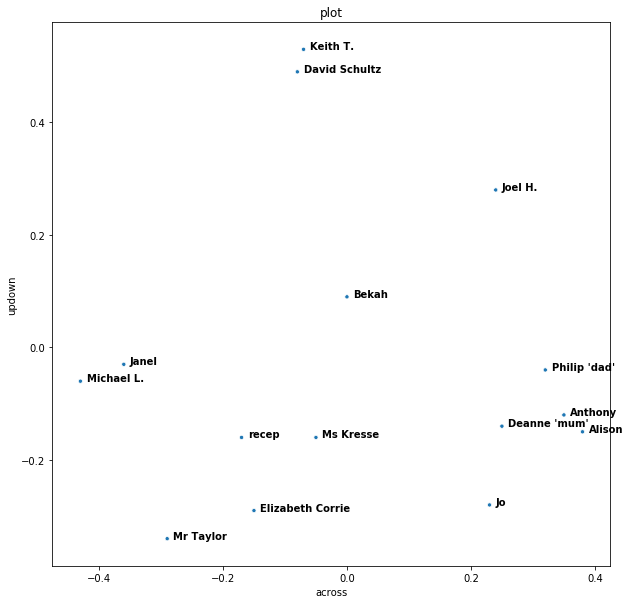

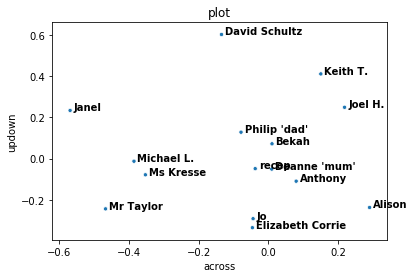

In [55]:
import seaborn as sns
# Borrowed code for labelled scatterplot
def scatter_text(x, y, text_column, title, xlabel, ylabel):
    """Scatter plot with country codes on the x y coordinates
       Based on this answer: https://stackoverflow.com/a/54789170/2641825"""
    # Create the scatter plot
    p1 = sns.scatterplot(x, y, size = 8, legend=False)
    # Add text besides each point
    for line in range(0,x.shape[0]):
         p1.text(x[line]+0.01, y[line], 
                 text_column[line], horizontalalignment='left', 
                 size='medium', color='black', weight='semibold')
    # Set title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return p1

# Scatterplot of unrotated components
pca_x = pca_kept.iloc[:,0]
pca_y = pca_kept.iloc[:,1]

plt.figure(figsize=(10,10))
scatter_text(pca_x, pca_y, people_names, title = 'plot', 
             xlabel = 'across',
             ylabel = 'updown')
plt.show()
# Scatterplot of rotated components
pca_rot_x=pca_components_rotated[:,0]
pca_rot_y=pca_components_rotated[:,1]

scatter_text(pca_rot_x, pca_rot_y, people_names, title = 'plot', 
             xlabel = 'across',
             ylabel = 'updown')
plt.show()

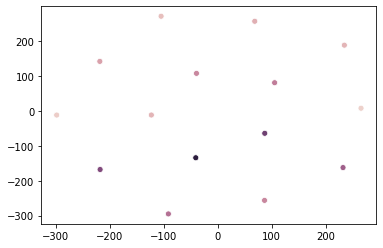

In [60]:
from sklearn.manifold import TSNE
tsne = TSNE()
X_embedded = tsne.fit_transform(ratings_matrix)
#As we can see, the model managed to take a 64-dimensional dataset and project it on to a 2-dimensional space in such a way that similar samples cluster together.
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend=None)

In [ ]:
from kneed import KneeLocator
x = list(range(1,16))
y = pca.singular_values_

In [21]:
matrix_knee = KneeLocator(x, y, S=1.0, curve='convex', direction='decreasing')
best_knee = matrix_knee.knee
print('The best knee in this dataset is {}'.format(best_knee))
print('The eigenvalue of the best knee is {}'.format(matrix_knee.knee_y))
fa_kept = pd.DataFrame(pca.components_[0:best_knee].round(2)).T
fa_kept.index = df_construct_list['combined']

array([[-0.77062359, -0.79040909, -0.21878633, -0.71123776,  1.10128588,
         0.29228651,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-1.15740384, -0.14264235, -0.01227493, -0.80455112, -0.71684722,
         0.47557753,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-1.19387753, -0.42267474, -0.36943586,  0.03912779,  0.11405173,
        -0.24355569,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.80745767, -0.9306282 , -0.41998835,  0.78853661, -0.51348662,
         0.48015238,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.37472633, -0.69277202, -1.66335574,  0.17001445,  0.74682336,
        -0.06083937,  0.        ,  0.        , 

Write code to do prose descriptions of the loadings for people

Get some other figures and data sorted
(e.g. which person from your sample is most/least representative of the factor. How are the people structured?)